<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3-ways-to-create-a-Machine-Learning-model-with-Keras-and-TensorFlow-2.0" data-toc-modified-id="3-ways-to-create-a-Machine-Learning-model-with-Keras-and-TensorFlow-2.0-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>3 ways to create a Machine Learning model with Keras and TensorFlow 2.0</a></span><ul class="toc-item"><li><span><a href="#For-the-purpose-of-exploring-data,-let’s-load-data-into-a-DataFrame" data-toc-modified-id="For-the-purpose-of-exploring-data,-let’s-load-data-into-a-DataFrame-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>For the purpose of exploring data, let’s load data into a DataFrame</a></span></li><li><span><a href="#Preparing-data-for-Keras-and-TensorFlow" data-toc-modified-id="Preparing-data-for-Keras-and-TensorFlow-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preparing data for Keras and TensorFlow</a></span></li></ul></li><li><span><a href="#Sequential-model" data-toc-modified-id="Sequential-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sequential model</a></span><ul class="toc-item"><li><span><a href="#When-to-use-Sequential-Model" data-toc-modified-id="When-to-use-Sequential-Model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>When to use Sequential Model</a></span></li></ul></li><li><span><a href="#Functional-API" data-toc-modified-id="Functional-API-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Functional API</a></span></li><li><span><a href="#Multi-input-and-multi-output-models" data-toc-modified-id="Multi-input-and-multi-output-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multi-input and multi-output models</a></span><ul class="toc-item"><li><span><a href="#hared-layer-in-Functional-API" data-toc-modified-id="hared-layer-in-Functional-API-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>hared layer in Functional API</a></span></li></ul></li><li><span><a href="#Model-Subclassing" data-toc-modified-id="Model-Subclassing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Subclassing</a></span></li></ul></div>

# 3 ways to create a Machine Learning model with Keras and TensorFlow 2.0

the 3 different ways to implement a Machine Learning model with Keras and TensorFlow 2.0

    Sequential Model is the easiest way to get up and running with Keras in TensorFlow 2.0
    Functional API is for more complex models, in particular model with multiple inputs or outputs.
    Model Subclassing is fully-customizable and enables us to implement our own custom forward-pass of the model

In this article, we are going to learn how to build a Machine Learning model with the three different ways and how to choose the right one for our project.
Environment setup, source code, and dataset preparation

In order to run this tutorial, you need to install

    TensorFlow 2, numpy, pandas, sklean, matplotlib

They can all be installed directly vis PyPI and I strongly recommend to create a new Virtual Environment. It is a best practice to avoid using base(root) as it might break your system.

For a tutorial on creating a Python virtual environment, you can take a look here:

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris=load_iris()

## For the purpose of exploring data, let’s load data into a DataFrame


In [3]:
# Load data into a DataFrame

df = pd.DataFrame(iris.data , columns=iris.feature_names)

# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Preparing data for Keras and TensorFlow

In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
label
df = pd.concat([df, label], axis=1)
df.head()

# drop old label
df.drop(['label'], axis=1, inplace=True)
df.head()


,label_setosa,label_versicolor,label_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [5]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)

X_train.shape , X_test.shape

((112, 4), (38, 4))

# Sequential model
The Sequential model is a linear stack of layers. There are 2 ways to create a Sequential model

    Passing a list of layers to the constructor
    Simply add layers via the .add() 
    
In order to train a Sequential model, we first have to configure our model using model.compile() with the following arguments:

    Use optimizer RMSProps (rmsprop)
    Use categorical cross-entropy loss function (categorical_crossentropy) for our multiple-class classification problem
    For simplicity, use accuracy as our evaluation metrics to evaluate the model during training and testing.    
  
## When to use Sequential Model

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input and one output.

A Sequential model is not appropriate when [1]:

    Your model has multiple inputs or multiple outputs
    Any of your layers have multiple inputs or multiple outputs
    You need to do layer sharing
    You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [6]:
# Passing a list of layers to the constructor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(5, activation='relu', input_shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax'),
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Adding layer via add() method
model_seq = Sequential()
model_seq.add(Dense(5, activation='relu', input_shape=(4,)))
model_seq.add(Dense(10, activation='relu'))
model_seq.add(Dense(3, activation='softmax'))

model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_seq.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model_seq.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2
                   )

Train on 89 samples, validate on 23 samples
Epoch 1/30
89/89 [==============================] - 1s 9ms/sample - loss: 1.1602 - accuracy: 0.6742 - val_loss: 1.3222 - val_accuracy: 0.5217
Epoch 2/30
89/89 [==============================] - 0s 191us/sample - loss: 1.0763 - accuracy: 0.6629 - val_loss: 1.2596 - val_accuracy: 0.5217
Epoch 3/30
89/89 [==============================] - 0s 157us/sample - loss: 1.0428 - accuracy: 0.6629 - val_loss: 1.1915 - val_accuracy: 0.4783
Epoch 4/30
89/89 [==============================] - 0s 157us/sample - loss: 1.0092 - accuracy: 0.6629 - val_loss: 1.1561 - val_accuracy: 0.4783
Epoch 5/30
89/89 [==============================] - 0s 146us/sample - loss: 0.9906 - accuracy: 0.6517 - val_loss: 1.1217 - val_accuracy: 0.4783
Epoch 6/30
89/89 [==============================] - 0s 146us/sample - loss: 0.9727 - accuracy: 0.6292 - val_loss: 1.0996 - val_accuracy: 0.4348
Epoch 7/30
89/89 [==============================] - 0s 157us/sample - loss: 0.9579 - accuracy:

[0.6832755960916218, 0.68421054]

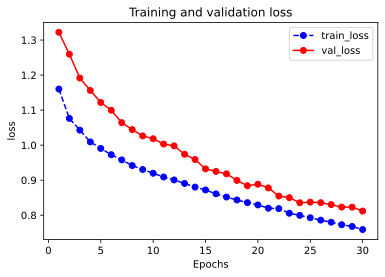

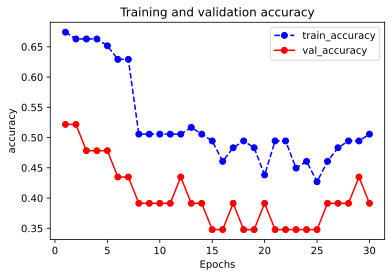

In [9]:
#  Model Evaluation

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    
model_seq.evaluate(x = X_test,y = y_test , verbose=0)

plot_metric(history, 'loss')
plot_metric(history, 'accuracy')


# Functional API
The Keras functional API provides a more flexible way of defining models. In particular, it allows us to define multiple input or output models as well as models that share layers.

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# This returns a tensor
inputs = Input(shape=(4,))

# A layer instance is callable on a tensor, and returns a tensor
x = Dense(5, activation='relu')(inputs)
x = Dense(10, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [11]:
# First configure model using model.compile()
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)# Then, train the model with fit()
history = model.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2
                   )

Train on 89 samples, validate on 23 samples
Epoch 1/30
89/89 [==============================] - 0s 5ms/sample - loss: 2.9164 - accuracy: 0.3258 - val_loss: 2.2762 - val_accuracy: 0.4783
Epoch 2/30
89/89 [==============================] - 0s 132us/sample - loss: 2.7063 - accuracy: 0.3258 - val_loss: 2.1834 - val_accuracy: 0.4783
Epoch 3/30
89/89 [==============================] - 0s 141us/sample - loss: 2.5754 - accuracy: 0.3258 - val_loss: 2.1136 - val_accuracy: 0.4783
Epoch 4/30
89/89 [==============================] - 0s 143us/sample - loss: 2.4715 - accuracy: 0.3258 - val_loss: 2.0498 - val_accuracy: 0.4783
Epoch 5/30
89/89 [==============================] - 0s 157us/sample - loss: 2.3801 - accuracy: 0.3258 - val_loss: 1.9993 - val_accuracy: 0.4783
Epoch 6/30
89/89 [==============================] - 0s 146us/sample - loss: 2.3056 - accuracy: 0.3258 - val_loss: 1.9542 - val_accuracy: 0.4783
Epoch 7/30
89/89 [==============================] - 0s 169us/sample - loss: 2.2393 - accuracy:

[1.438703637374075, 0.23684211]

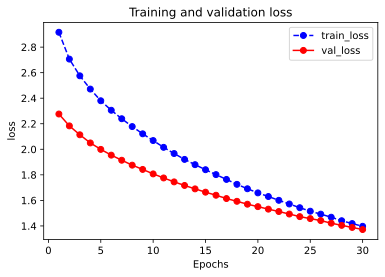

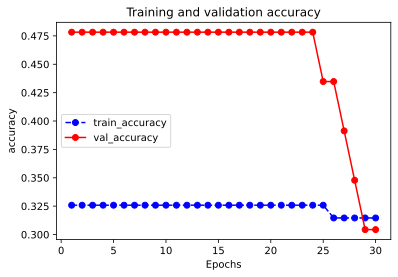

In [12]:
model.evaluate(x = X_test,y = y_test , verbose=0)

plot_metric(history, 'loss')
plot_metric(history, 'accuracy')


# Multi-input and multi-output models

Models with multiple inputs or multiple outputs are good use cases for the Functional API. Here, I am showing 3 different scenarios:

    A model with 2 inputs and 1 output
    A model with 1 input and 2 outputs
    A model with 2 input and 2 outputs

For a model with 2 inputs and 1 output. Suppose we have image data and structured data for iris flower classification. We would like to build a Machine Learning model like below:


![](./i/1g53L2TfbdLDzFTJTlCYsxg.png)

In [13]:
# For the scenario with 2 inputs and 1 output

from tensorflow.keras.layers import concatenate

# 2 inputs, one structured data, the other image data
input_structure = Input(shape=(4,), name='input_structure')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structure)
x_2 = Dense(100, activation='relu')(input_image)

c = concatenate([x_1, x_2])

outputs = Dense(3, activation='sigmoid', name='outputs')(c)

model = Model(inputs=[input_structure, input_image], outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_structure (InputLayer)    [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 10)           50          input_structure[0][0]            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 100)          25700       input_image[0][0]                
____________________________________________________________________________________________

In order to take 2 different inputs, we need to concatenate them using concatenate([x_1, x_2]).

To define a model with multiple inputs, we just need to specify a list of inputs inputs=[input_structure, input_image].

For a model with 1 input and 2 outputs. Suppose we only have image data and the task is to identify whether the given image is a flower and if yes, what type of iris flower it is?

![](./i/13iqPWQZDykNNWnQgD_knZg.png)

In [14]:
## 1 inputs, 2 output

from tensorflow.keras.layers import concatenate

# only one input
input_image = Input(shape=(256,), name='input_image')

# middle layer
x = Dense(300, activation='relu')(input_image)

# output layer
output_1 = Dense(1, activation='sigmoid', name='output_1')(x)
output_2 = Dense(3, activation='softmax', name='output_2')(x)

model = Model(inputs=input_image, outputs=[output_1, output_2])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 300)          77100       input_image[0][0]                
__________________________________________________________________________________________________
output_1 (Dense)                (None, 1)            301         dense_11[0][0]                   
__________________________________________________________________________________________________
output_2 (Dense)                (None, 3)            903         dense_11[0][0]                   
Total params: 78,304
Trainable params: 78,304
Non-trainable params: 0
______________________

In order to define a model with multiple outputs, we just need to specify a list of outputs outputs=[output_1, output_2] .

If all runs smoothly, we should get a summary like below.

For a model with 2 inputs and 2 outputs. Suppose we have structured data and image data. The task is to identify whether an iris flower is in the image and what type of iris flower it is.

![](./i/1LS3KVWlIbARPtYEt_oro-Q.png)

In [15]:
## 2 inputs, 2 outputs
from tensorflow.keras.layers import concatenate

# 2 inputs, one structured data, the other image data
input_structured = Input(shape=(4,), name='input_structured')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structured)
x_2 = Dense(300, activation='relu')(input_image)

c = concatenate([x_1, x_2])

# output layser
output_1 = Dense(1, activation='sigmoid', name='output_1')(c)
output_2 = Dense(3, activation='softmax', name='output_2')(c)

model = Model(inputs=[input_structured, input_image], outputs=[output_1, output_2])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_structured (InputLayer)   [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 10)           50          input_structured[0][0]           
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 300)          77100       input_image[0][0]                
____________________________________________________________________________________________

## hared layer in Functional API

Another good use for the Functional API are models that use shared layers. Let’s take a look at shared layers.

In [16]:
inputs = Input(shape=(4,))

# a layer instance is callable on a tensor, and returns a tensor
shared_layer = Dense(4, activation='relu')

# Now we apply the layer three times
x = shared_layer(inputs)
x = shared_layer(x)
x = shared_layer(x)
x = shared_layer(x)

predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 4)            20          input_2[0][0]                    
                                                                 dense_14[0][0]                   
                                                                 dense_14[1][0]                   
                                                                 dense_14[2][0]                   
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 3)            15          dense_14[3][0]             

# Model Subclassing

The last way to implement a Machine Learning model with Keras and TensorFlow 2.0 is called Model Subclassing. This way of building models gives you a low level of control over both the construction and the operation of a model.

Let’s take a look at how to use it to build our iris flow classifier.

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class CustomModel(Model):
    
    def __init__(self, **kwargs):
        super(CustomModel, self).__init__(**kwargs)
        self.dense1 = Dense(5, activation='relu', )
        self.dense2 = Dense(10, activation='relu')
        self.dense3 = Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)
        

my_custom_model = CustomModel(name='my_custom_model')
# 3.1 Training a Model Subclassing model
my_custom_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = my_custom_model.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2)

Train on 89 samples, validate on 23 samples
Epoch 1/30
89/89 [==============================] - 0s 5ms/sample - loss: 1.5506 - accuracy: 0.3596 - val_loss: 1.7235 - val_accuracy: 0.2174
Epoch 2/30
89/89 [==============================] - 0s 147us/sample - loss: 1.4432 - accuracy: 0.3596 - val_loss: 1.6230 - val_accuracy: 0.2174
Epoch 3/30
89/89 [==============================] - 0s 141us/sample - loss: 1.3798 - accuracy: 0.3596 - val_loss: 1.5461 - val_accuracy: 0.2174
Epoch 4/30
89/89 [==============================] - 0s 146us/sample - loss: 1.3300 - accuracy: 0.3596 - val_loss: 1.4925 - val_accuracy: 0.2174
Epoch 5/30
89/89 [==============================] - 0s 151us/sample - loss: 1.2955 - accuracy: 0.3596 - val_loss: 1.4508 - val_accuracy: 0.2174
Epoch 6/30
89/89 [==============================] - 0s 152us/sample - loss: 1.2690 - accuracy: 0.3596 - val_loss: 1.4163 - val_accuracy: 0.2174
Epoch 7/30
89/89 [==============================] - 0s 146us/sample - loss: 1.2457 - accuracy:

In [18]:
my_custom_model.summary()

Model: "my_custom_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             multiple                  25        
_________________________________________________________________
dense_17 (Dense)             multiple                  60        
_________________________________________________________________
dense_18 (Dense)             multiple                  33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


[0.909094983025601, 0.84210527]

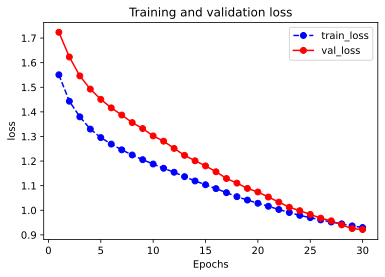

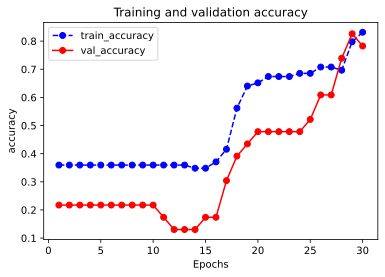

In [19]:
my_custom_model.evaluate(x = X_test,y = y_test , verbose=0)

plot_metric(history, 'loss')
plot_metric(history, 'accuracy')
